In [1]:
%pip install -q latexify-py

Note: you may need to restart the kernel to use updated packages.


In [1]:
%pip install -q sympy

Note: you may need to restart the kernel to use updated packages.


In [9]:
import latexify
import sympy
from search_optimization_tools.algorithms.trajectory_based import simulated_annealing
from search_optimization_tools.problems import problem_base, continuous_function_base, tsp
import random
import math
import numpy as np

ModuleNotFoundError: No module named 'search_optimization_tools'

In [2]:
class simple_parabolic_curve(problem_base):
    def __init__(self) -> None:
        super().__init__()
        self.__bounds = [0, 31]
        self.__range = self.__bounds[1] - self.__bounds[0]         

    def get_init_solution(self):
        return self.__bounds[0] + random.random() * self.__range
    
    def get_neighbour_solution(self, sol):
        new_sol = self.__bounds[0] - 1
        while new_sol<self.__bounds[0] or new_sol>self.__bounds[1]:
            new_sol = random.gauss(sol, 1)
        return new_sol

    def eval_solution(self, sol):
        return (sol-6)**2

simple_parabolic_curve_obj = simple_parabolic_curve()

In [3]:
sa = simulated_annealing(simple_parabolic_curve_obj, max_iter=1000, max_iter_per_temp=100, initial_temp=1000, final_temp=0.0001, cooling_schedule='geometric', cooling_alpha=0.9)

In [4]:
sa.run()
sa.s_best, sa.val_best,sa.t,sa.iter

(5.999828237206987, 2.950245706351513e-08, 9.97938882337113e-05, 154)

In [5]:
sa.init_annealing()
print ("init_sol=%f, eval_sol=%f, cur_temp=%f, cur_iter=%f" %(sa.s_best, sa.val_best,sa.t,sa.iter))
for i in range(1000):
    sa.annealing_step()
    sa.iter += 1
    sa.update_temperature()
    print ("cur_sol=%f, eval_sol=%f, cur_temp=%f, cur_iter=%f" %(sa.s_best, sa.val_best,sa.t,sa.iter))

init_sol=25.076940, eval_sol=363.929628, cur_temp=1000.000000, cur_iter=1.000000
cur_sol=25.076940, eval_sol=363.929628, cur_temp=810.000000, cur_iter=2.000000
cur_sol=24.979032, eval_sol=360.203640, cur_temp=729.000000, cur_iter=3.000000
cur_sol=24.652223, eval_sol=347.905412, cur_temp=656.100000, cur_iter=4.000000
cur_sol=24.652223, eval_sol=347.905412, cur_temp=590.490000, cur_iter=5.000000
cur_sol=24.505525, eval_sol=342.454447, cur_temp=531.441000, cur_iter=6.000000
cur_sol=24.505525, eval_sol=342.454447, cur_temp=478.296900, cur_iter=7.000000
cur_sol=24.505525, eval_sol=342.454447, cur_temp=430.467210, cur_iter=8.000000
cur_sol=24.505525, eval_sol=342.454447, cur_temp=387.420489, cur_iter=9.000000
cur_sol=24.505525, eval_sol=342.454447, cur_temp=348.678440, cur_iter=10.000000
cur_sol=24.505525, eval_sol=342.454447, cur_temp=313.810596, cur_iter=11.000000
cur_sol=24.505525, eval_sol=342.454447, cur_temp=282.429536, cur_iter=12.000000
cur_sol=24.505525, eval_sol=342.454447, cur_tem

In [6]:
@latexify.with_latex
def simple_example(x):
    return (x-6)**2

simple_example_bounds = np.asarray([[0, 31]])
simple_example_obj = continuous_function_base(simple_example, simple_example_bounds)
simple_example

<latexify.core.with_latex.<locals>._LatexifiedFunction at 0x1dcef042f20>

In [7]:
sa = simulated_annealing(simple_example_obj, max_iter=1000, max_iter_per_temp=100, initial_temp=1000, final_temp=0.0001, cooling_schedule='geometric', cooling_alpha=0.9)
sa.run()
sa.s_best, sa.val_best,sa.t,sa.iter

(array([5.9995971]), 1.6232514097748782e-07, 9.97938882337113e-05, 154)

global minimum: x = 5.9996, f(x) = 0.0000


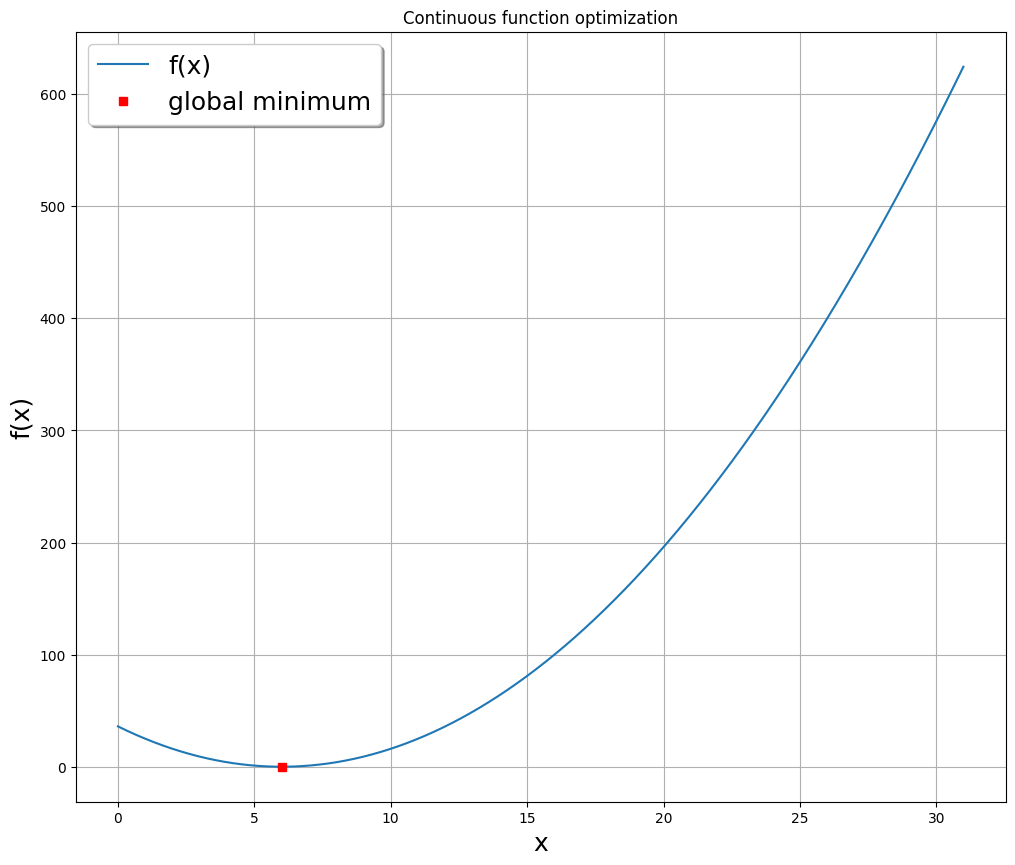

In [8]:
simple_example_obj.plot(sa.s_best)

In [9]:
@latexify.with_latex
def bukin(x_1, x_2):
    return 100*math.sqrt(abs(x_2-0.01*x_1**2)) + 0.01 * abs(x_1 + 10)

bukin_bounds = np.asarray([[-15, -5], [-3, 3]])
bukin_obj = continuous_function_base(bukin, bukin_bounds, 5)
bukin

<latexify.core.with_latex.<locals>._LatexifiedFunction at 0x1dcef193d60>

In [10]:
sa = simulated_annealing(bukin_obj, max_iter=100, max_iter_per_temp=1000, initial_temp=10000, final_temp=0.0000001, cooling_schedule='geometric', cooling_alpha=0.9)
sa.run()
sa.s_best, sa.val_best,sa.t,sa.iter

(array([-5.3478667 ,  0.28598522]),
 0.386526029092766,
 0.26561398887587545,
 101)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


global minimum: x = -5.3479, 0.2860, f(x) = 0.3865


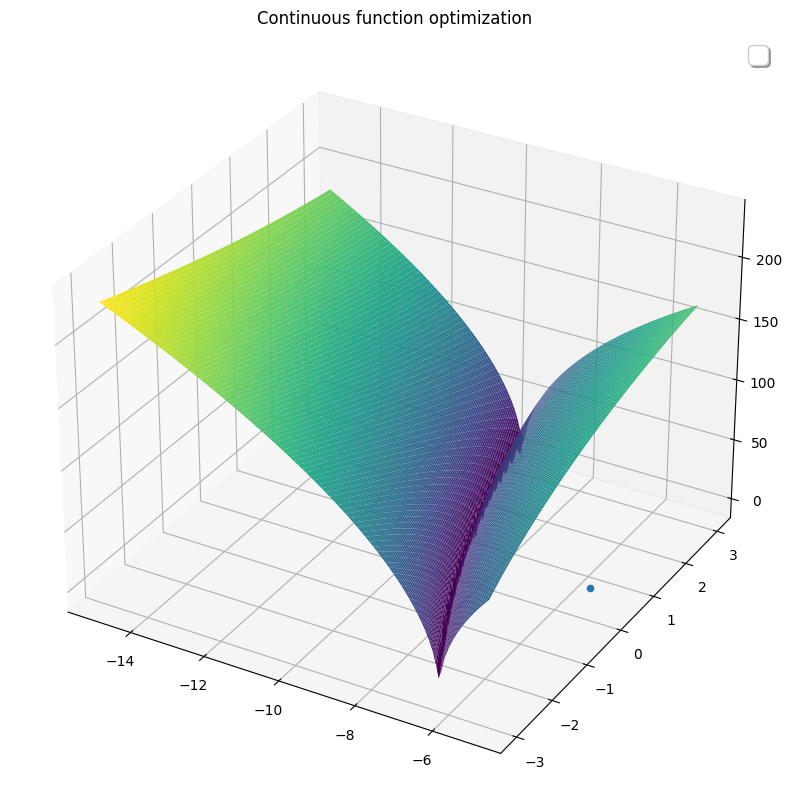

In [11]:
bukin_obj.plot(sa.s_best)

In [12]:
pi = math.pi
@latexify.with_latex
def gramacy_and_lee(x):
    return math.sin(10*pi*x)/(2*x) + (x-1)**4

gramacy_and_lee_bounds = np.asarray([[0.5, 2.5]])
gramacy_and_lee_obj = continuous_function_base(gramacy_and_lee, gramacy_and_lee_bounds, .1)
gramacy_and_lee

<latexify.core.with_latex.<locals>._LatexifiedFunction at 0x1dcf18d8580>

In [13]:
sa = simulated_annealing(gramacy_and_lee_obj, max_iter=10000, max_iter_per_temp=1000, initial_temp=10000, final_temp=0.0000001, cooling_schedule='geometric', cooling_alpha=0.9)
sa.run()
sa.s_best, sa.val_best,sa.t,sa.iter

(array([0.54856409]), -0.8690111348027294, 9.385226860283621e-08, 242)

global minimum: x = 0.5486, f(x) = -0.8690


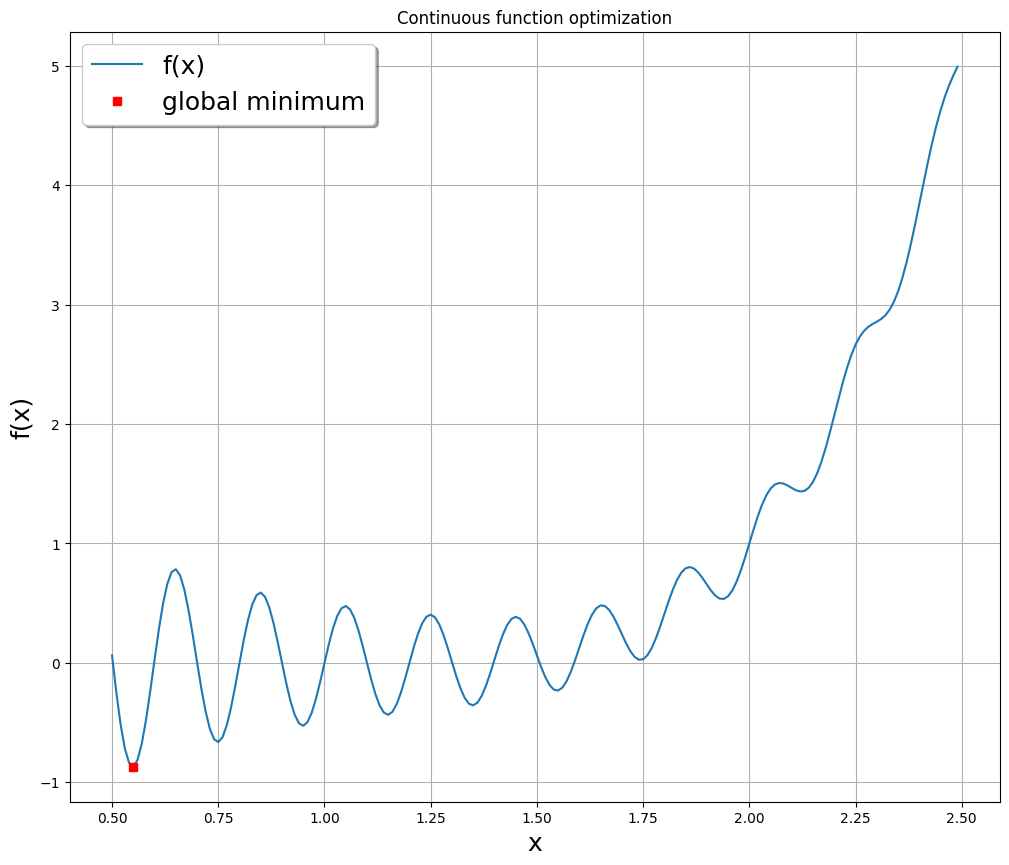

In [14]:
gramacy_and_lee_obj.plot(sa.s_best)

In [15]:
def griewank(*x):
    x = np.asarray(x)
    return np.sum(x**2/4000) - np.prod(np.cos(x/np.sqrt(np.asarray(range(1, len(x)+1))))) + 1

griewank_bounds = np.asarray([[-600, 600]])
griewank_1d=continuous_function_base(griewank, griewank_bounds, 10)

In [16]:
sa = simulated_annealing(griewank_1d, max_iter=10000, max_iter_per_temp=1000, initial_temp=10000, final_temp=0.0000001, cooling_schedule='geometric', cooling_alpha=0.9)
sa.run()
sa.s_best, sa.val_best,sa.t,sa.iter

(array([-6.53120697e-06]), 2.133904164480782e-11, 9.385226860283621e-08, 242)

global minimum: x = -0.0000, f(x) = 0.0000


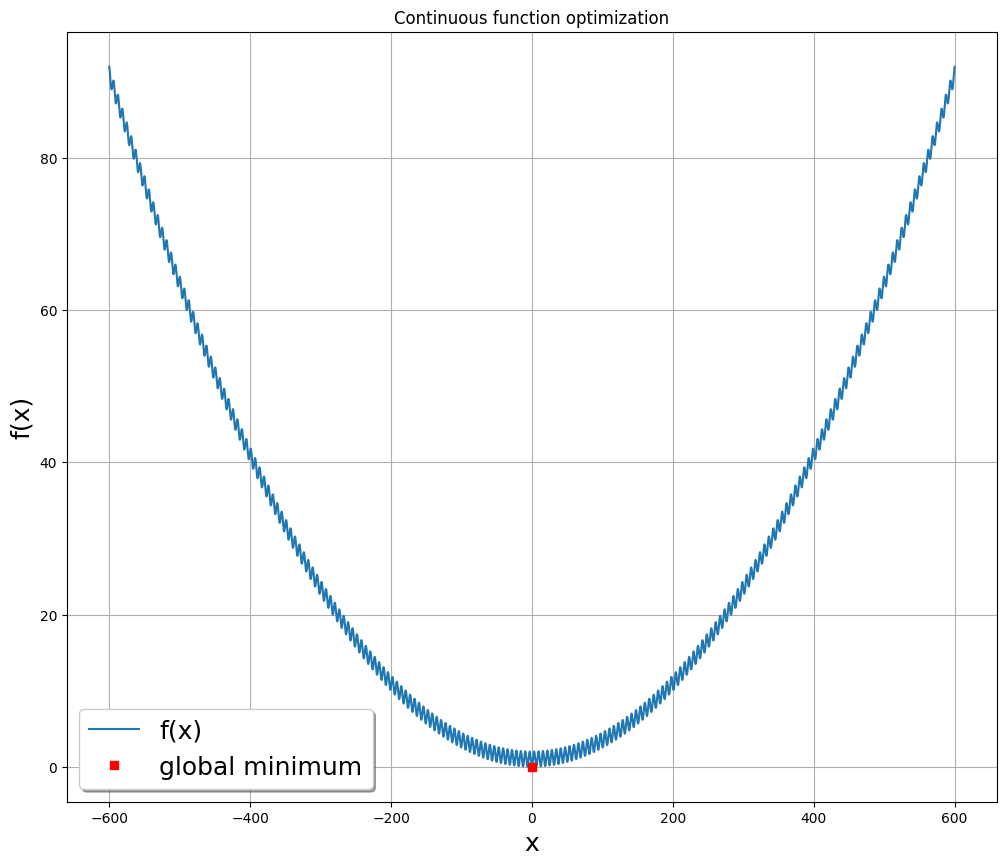

In [17]:
griewank_1d.plot(sa.s_best)

In [18]:
griewank_bounds_2d = np.asarray([[-600, 600]]*2)
griewank_2d=continuous_function_base(griewank, griewank_bounds_2d, (griewank_bounds_2d[:, 1] - griewank_bounds_2d[:, 0])/10)

In [19]:
sa = simulated_annealing(griewank_2d, max_iter=10000, max_iter_per_temp=1000, initial_temp=10000, final_temp=0.0000001, cooling_schedule='linear_inverse', cooling_alpha=0.9)
sa.run()
sa.s_best, sa.val_best,sa.t,sa.iter

(array([ 0.00585375, -0.02641886]),
 0.00019179718988937555,
 1.1109876680368849,
 10001)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


global minimum: x = 0.0059, -0.0264, f(x) = 0.0002


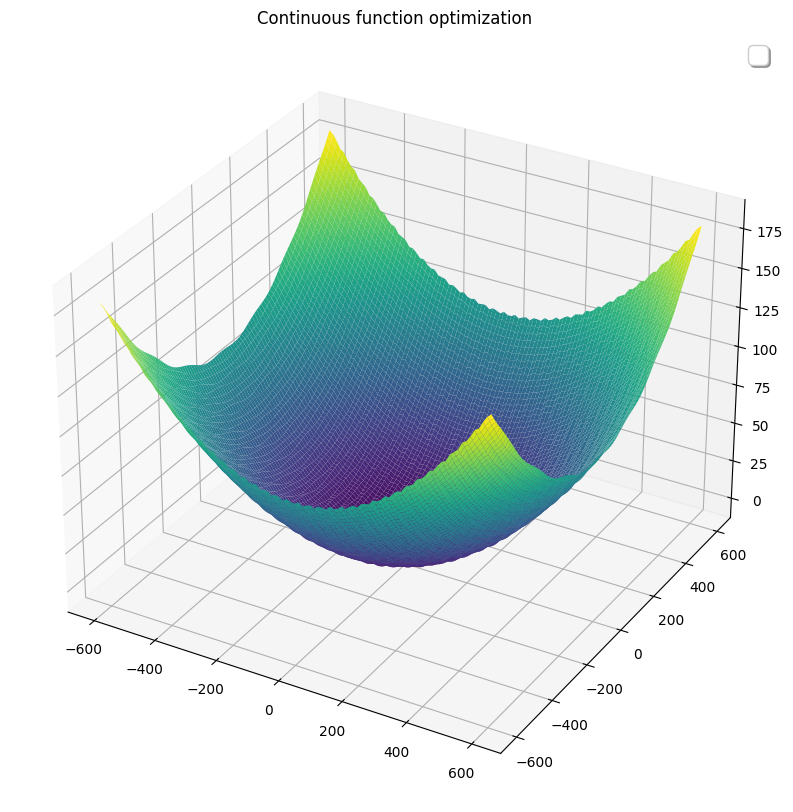

In [20]:
griewank_2d.plot(sa.s_best)

In [21]:
griewank_bounds_3d = np.asarray([[-600, 600]]*3)
griewank_3d=continuous_function_base(griewank, griewank_bounds_3d, (griewank_bounds_3d[:, 1] - griewank_bounds_3d[:, 0])/10)

In [22]:
sa = simulated_annealing(griewank_3d, max_iter=10000, max_iter_per_temp=1000, initial_temp=10000, final_temp=0.0000001, cooling_schedule='linear_inverse', cooling_alpha=0.9)
sa.run()
sa.s_best, sa.val_best,sa.t,sa.iter

(array([-0.15652032,  8.65424995, -0.20049298]),
 0.05069297893539415,
 1.1109876680368849,
 10001)

In [22]:
dists = [ [0] * 5 for _ in range(5)]
dists[0][1] = dists[1][0] = 4
dists[0][2] = dists[2][0] = 2
dists[0][3] = dists[3][0] = 9
dists[0][4] = dists[4][0] = 12
dists[1][2] = dists[2][1] = 7
dists[1][3] = dists[3][1] = 5
dists[1][4] = dists[4][1] = 5
dists[2][3] = dists[3][2] = 4
dists[2][4] = dists[4][2] = 10
dists[3][4] = dists[4][3] = 3
dists

[[0, 4, 2, 9, 12],
 [4, 0, 7, 5, 5],
 [2, 7, 0, 4, 10],
 [9, 5, 4, 0, 3],
 [12, 5, 10, 3, 0]]

In [23]:
tsp_sample = tsp(dists, 'random_swap')

In [24]:
sa = simulated_annealing(tsp_sample, max_iter=10000, max_iter_per_temp=1, initial_temp=500, final_temp=50, cooling_schedule='linear_inverse', cooling_alpha=0.9)
sa.run()
sa.s_best, sa.val_best,sa.t,sa.iter

([4, 2, 3, 0, 1], 18, 0.0999900009999, 5556)

In [25]:
sa.init_annealing()
print ("init_sol=%s, eval_sol=%s, cur_temp=%f, cur_iter=%f" %(sa.s_best, sa.val_best,sa.t,sa.iter))
for i in range(1000):
    sa.annealing_step()
    sa.iter += 1
    sa.update_temperature()
    print ("cur_sol=%s, eval_sol=%s, cur_temp=%f, cur_iter=%f" %(sa.s_best, sa.val_best,sa.t,sa.iter))

init_sol=[4, 2, 0, 3, 1], eval_sol=31, cur_temp=500.000000, cur_iter=1.000000
cur_sol=[4, 2, 3, 0, 1], eval_sol=32, cur_temp=178.571429, cur_iter=2.000000
cur_sol=[4, 2, 0, 3, 1], eval_sol=31, cur_temp=135.135135, cur_iter=3.000000
cur_sol=[0, 2, 4, 3, 1], eval_sol=24, cur_temp=108.695652, cur_iter=4.000000
cur_sol=[0, 2, 3, 4, 1], eval_sol=18, cur_temp=90.909091, cur_iter=5.000000
cur_sol=[2, 0, 3, 4, 1], eval_sol=26, cur_temp=78.125000, cur_iter=6.000000
cur_sol=[2, 3, 0, 4, 1], eval_sol=37, cur_temp=68.493151, cur_iter=7.000000
cur_sol=[2, 1, 0, 4, 3], eval_sol=30, cur_temp=60.975610, cur_iter=8.000000
cur_sol=[2, 4, 0, 1, 3], eval_sol=35, cur_temp=54.945055, cur_iter=9.000000
cur_sol=[0, 4, 2, 1, 3], eval_sol=43, cur_temp=50.000000, cur_iter=10.000000
cur_sol=[0, 1, 2, 4, 3], eval_sol=33, cur_temp=45.871560, cur_iter=11.000000
cur_sol=[0, 4, 2, 1, 3], eval_sol=33, cur_temp=42.372881, cur_iter=12.000000
cur_sol=[0, 4, 2, 3, 1], eval_sol=35, cur_temp=39.370079, cur_iter=13.000000
cur

In [2]:
cities = []
ignore = True
with open("search_optimization_tools/problems/samples/tsp/a280.tsp", "r") as f:
    for line in f:
        line = line.strip()
        if line == 'EOF':
            break
        if not ignore:
            cord = [int(_) for _ in line.split()[1:]] 
            # print(cord)
            cities.append(cord)
        if line == "NODE_COORD_SECTION":
            ignore = False

a280_dists = [ [0] * len(cities) for _ in range(len(cities))]
for i in range(len(cities)):
    for j in range(i+1, len(cities)):
        a280_dists[i][j] = a280_dists[j][i] = math.sqrt((cities[i][0]-cities[j][0])**2 + (cities[i][1]-cities[j][1])**2)


In [3]:
a280_tsp_1 = tsp(a280_dists, 'random_swap', num_swaps=1)
a280_tsp_5 = tsp(a280_dists, 'random_swap', num_swaps=5)
a280_tsp_10 = tsp(a280_dists, 'random_swap', num_swaps=10)
a280_tsp_15 = tsp(a280_dists, 'random_swap', num_swaps=15)

In [14]:
sa_1 = simulated_annealing(a280_tsp_1, max_iter=80000, max_iter_per_temp=1000, initial_temp=10000, final_temp=0.1, cooling_schedule='linear_inverse', cooling_alpha=0.85)
sa_5 = simulated_annealing(a280_tsp_5, max_iter=80000, max_iter_per_temp=1000, initial_temp=10000, final_temp=0.1, cooling_schedule='linear_inverse', cooling_alpha=0.85)
sa_10 = simulated_annealing(a280_tsp_10, max_iter=80000, max_iter_per_temp=1000, initial_temp=10000, final_temp=0.1, cooling_schedule='linear_inverse', cooling_alpha=0.85)
sa_15 = simulated_annealing(a280_tsp_15, max_iter=80000, max_iter_per_temp=1000, initial_temp=10000, final_temp=0.1, cooling_schedule='linear_inverse', cooling_alpha=0.85)

In [15]:
sols = {
    'sa_1': [0] * sa_1.max_iter,
    'sa_5': [0] * sa_5.max_iter,
    'sa_10': [0] * sa_10.max_iter,
    'sa_15': [0] * sa_15.max_iter,
}

In [91]:
sa_1.init_annealing()
sa_5.init_annealing()
sa_10.init_annealing()
sa_15.init_annealing()
# print ("1:  eval_sol=%s, cur_temp=%f, cur_iter=%f" %(sa_1.val_best,sa_1.t,sa_1.iter))
# print ("5:  eval_sol=%s, cur_temp=%f, cur_iter=%f" %(sa_5.val_best,sa_5.t,sa_5.iter))
# print ("10: eval_sol=%s, cur_temp=%f, cur_iter=%f" %(sa_10.val_best,sa_10.t,sa_10.iter))
# print ("15: eval_sol=%s, cur_temp=%f, cur_iter=%f" %(sa_15.val_best,sa_15.t,sa_15.iter))
# print()
sols['sa_1'][sa_1.iter-1] = sa_1.val_best
sols['sa_5'][sa_5.iter-1] = sa_5.val_best
sols['sa_10'][sa_10.iter-1] = sa_10.val_best
sols['sa_15'][sa_15.iter-1] = sa_15.val_best
for i in range(70000):
    for _ in range(1000):
        sa_1.annealing_step()
        sa_5.annealing_step()
        sa_10.annealing_step()
        sa_15.annealing_step()
    sa_1.update_temperature()
    sa_5.update_temperature()
    sa_10.update_temperature()
    sa_15.update_temperature()
    sa_1.iter += 1
    sa_5.iter += 1
    sa_10.iter += 1
    sa_15.iter += 1
    sols['sa_1'][sa_1.iter-1] = sa_1.val_best
    sols['sa_5'][sa_5.iter-1] = sa_5.val_best
    sols['sa_10'][sa_10.iter-1] = sa_10.val_best
    sols['sa_15'][sa_15.iter-1] = sa_15.val_best

    if i % 10000 == 0:
        print ("1:  eval_sol=%s, cur_temp=%f, cur_iter=%f" %(sa_1.val_best,sa_1.t,sa_1.iter))
        print ("5:  eval_sol=%s, cur_temp=%f, cur_iter=%f" %(sa_5.val_best,sa_5.t,sa_5.iter))
        print ("10: eval_sol=%s, cur_temp=%f, cur_iter=%f" %(sa_10.val_best,sa_10.t,sa_10.iter))
        print ("15: eval_sol=%s, cur_temp=%f, cur_iter=%f" %(sa_15.val_best,sa_15.t,sa_15.iter))
        print()

print ("1:  eval_sol=%s, cur_temp=%f, cur_iter=%f" %(sa_1.val_best,sa_1.t,sa_1.iter))
print ("5:  eval_sol=%s, cur_temp=%f, cur_iter=%f" %(sa_5.val_best,sa_5.t,sa_5.iter))
print ("10: eval_sol=%s, cur_temp=%f, cur_iter=%f" %(sa_10.val_best,sa_10.t,sa_10.iter))
print ("15: eval_sol=%s, cur_temp=%f, cur_iter=%f" %(sa_15.val_best,sa_15.t,sa_15.iter))


1:  eval_sol=33208.825555213756, cur_temp=5405.405405, cur_iter=2.000000
5:  eval_sol=34087.315092778204, cur_temp=5405.405405, cur_iter=2.000000
10: eval_sol=35403.16612044999, cur_temp=5405.405405, cur_iter=2.000000
15: eval_sol=35802.11083100452, cur_temp=5405.405405, cur_iter=2.000000

1:  eval_sol=29468.196533182636, cur_temp=1.176215, cur_iter=10002.000000
5:  eval_sol=28711.467153412337, cur_temp=1.176215, cur_iter=10002.000000
10: eval_sol=29003.371188862857, cur_temp=1.176215, cur_iter=10002.000000
15: eval_sol=29126.668494164584, cur_temp=1.176215, cur_iter=10002.000000

1:  eval_sol=29407.808374279808, cur_temp=0.588171, cur_iter=20002.000000
5:  eval_sol=28711.467153412337, cur_temp=0.588171, cur_iter=20002.000000
10: eval_sol=28743.310615813727, cur_temp=0.588171, cur_iter=20002.000000
15: eval_sol=28981.47436092115, cur_temp=0.588171, cur_iter=20002.000000

1:  eval_sol=29164.08066355524, cur_temp=0.392128, cur_iter=30002.000000
5:  eval_sol=28711.467153412337, cur_temp=0

KeyboardInterrupt: 

In [17]:
import pandas as pd

In [62]:
wal_df = pd.read_csv("search_optimization_tools/problems/samples/tsp/Walmart_ON.csv")
wal_dists = np.loadtxt("search_optimization_tools/problems/samples/tsp/wal_distkm.txt", dtype=float)

In [173]:
gta = wal_df[wal_df.postal_code.str.startswith('M') ]

In [174]:
gta.shape

(14, 8)

In [97]:
wal_df.shape

(153, 8)

In [104]:
tor = gta

In [105]:
# tor = wal_df[wal_df.city.isin(['Toronto'])]
tor_ind = tor.index
tor_dists = wal_dists[tor_ind][:,tor_ind]
tor= tor.reset_index(drop=True)
tor

,latitude,longitude,store_number,phone,address,city,Province,postal_code
0,43.783690,-79.290933,Walmart; #3000,(416) 291-4100,3850 Sheppard Ave E,Agincourt,ON,M1T 3L4
1,43.866158,-79.013226,Walmart Supercentre; #3001,(905) 426-6160,270 Kingston Rd E RR #1,Ajax,ON,L1S 4S7
2,44.161520,-79.824624,Walmart Supercentre; #1083,(705) 435-7100,30 Dunham Dr,Alliston,ON,L9R 0G1
3,42.096909,-83.109026,Walmart Supercentre; #1072,(519)736-5600,400 Sandwich St S,Amherstburg,ON,N9V 3L4
4,43.198289,-80.014142,Walmart Supercentre; #3127,(905) 648-9980,1051 Garner Rd W,Ancaster,ON,L9G 3K9
...,...,...,...,...,...,...,...,...
131,43.917370,-78.959730,Walmart Supercentre; #3113,(905) 655-0206,4100 Baldwin St S,Whitby,ON,L1R 3H8
132,42.270682,-83.010996,Walmart Supercentre; #3114,(519) 969-8121,3120 Dougall Ave,Windsor,ON,N9E 1S7
133,42.314048,-82.942432,Walmart Supercentre; #3115,(519) 945-3065,7100 Tecumseh Rd E,Windsor,ON,N8T 1E6
134,43.786103,-79.628413,Walmart Supercentre; #1081,(905) 851-4648,8300 Hwy 27,Woodbridge,ON,L4H 0R9


In [166]:
tor_dists

array([[  0.        ,  25.56905102,  81.88307501, ..., 366.94461058,
         32.17379133, 147.78183052],
       [ 25.15371202,   0.        , 102.77725532, ..., 391.54092897,
         56.00789032, 172.37814891],
       [ 82.30074445, 103.22419337,   0.        , ..., 378.03993438,
         50.72090387, 158.87715432],
       ...,
       [366.30463954, 391.09767174, 377.42265756, ...,   0.        ,
        344.67264805, 219.1085215 ],
       [ 32.20390077,  56.42383927,  50.69228967, ..., 345.72297886,
          0.        , 126.5601988 ],
       [148.37869621, 173.17172841, 159.49671423, ..., 219.77119991,
        126.74670472,   0.        ]])

In [107]:
tor_tsp = tsp(tor_dists, 'random_swap', num_swaps=1)

In [157]:
sa = simulated_annealing(tor_tsp, max_iter=10000, max_iter_per_temp=1, initial_temp=500, final_temp=0.0001, cooling_schedule='linear_inverse', cooling_alpha=0.9)
sa.run()
sa.val_best,sa.t,sa.iter

(24226.499431338176, 0.05554938340184424, 10001)

In [88]:
sa.init_annealing()
print ("init_sol=%s, eval_sol=%s, cur_temp=%f, cur_iter=%f" %(sa.s_best, sa.val_best,sa.t,sa.iter))
for i in range(1000):
    sa.annealing_step()
    sa.update_temperature()
    sa.iter += 1
    print ("cur_sol=%s, eval_sol=%s, cur_temp=%f, cur_iter=%f" %(sa.s_best, sa.val_best,sa.t,sa.iter))

init_sol=[3, 1, 0, 4, 2], eval_sol=50.09608835947222, cur_temp=500.000000, cur_iter=1.000000
cur_sol=[3, 1, 0, 2, 4], eval_sol=57.67026109986283, cur_temp=263.157895, cur_iter=2.000000
cur_sol=[3, 1, 0, 4, 2], eval_sol=50.09608835947222, cur_temp=178.571429, cur_iter=3.000000
cur_sol=[3, 0, 1, 4, 2], eval_sol=67.72971069479362, cur_temp=135.135135, cur_iter=4.000000
cur_sol=[3, 2, 1, 4, 0], eval_sol=59.19549733524644, cur_temp=108.695652, cur_iter=5.000000
cur_sol=[3, 2, 0, 4, 1], eval_sol=50.51632539440287, cur_temp=90.909091, cur_iter=6.000000
cur_sol=[1, 2, 0, 4, 3], eval_sol=49.13090648766556, cur_temp=78.125000, cur_iter=7.000000
cur_sol=[0, 2, 1, 4, 3], eval_sol=66.75286309376503, cur_temp=68.493151, cur_iter=8.000000
cur_sol=[0, 2, 1, 3, 4], eval_sol=49.183677763796624, cur_temp=60.975610, cur_iter=9.000000
cur_sol=[0, 2, 1, 4, 3], eval_sol=66.75286309376503, cur_temp=54.945055, cur_iter=10.000000
cur_sol=[0, 2, 1, 3, 4], eval_sol=49.183677763796624, cur_temp=50.000000, cur_iter